In [147]:
cd /home

/home


In [159]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd
import numpy as np
import os 

from src.data.zero import pretraining_pipeline
from src.data.loaders import load_data

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
path = './data/records/atlas/fold_0/atlas_20/'

batch_size = 16
window_size = 10

probed = .6
random_same = 0.1
sampling = False

In [194]:
old_batches = pretraining_pipeline(os.path.join(path, 'train'),
                                     batch_size,
                                     window_size,
                                     msk_frac=probed,
                                     rnd_frac=random_same,
                                     same_frac=random_same,
                                     sampling=sampling, # sampling
                                     shuffle=False, #shuffle
                                     repeat=1,
                                     num_cls=None,
                                     normalize='zero-mean',
                                     cache=True)

new_batches = load_data(dataset=os.path.join(path, 'train'), 
                          batch_size=batch_size, 
                          probed=probed,  
                          random_same=random_same,
                          window_size=window_size, 
                          nsp_prob=0., 
                          repeat=1, 
                          sampling=sampling,
                          off_nsp=True,
                          shuffle=False,
                          num_cls=None)

[INFO] Repeating dataset x1 times
[INFO] Loading PT task: Masking


2023-07-26 14:21:05.526282: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


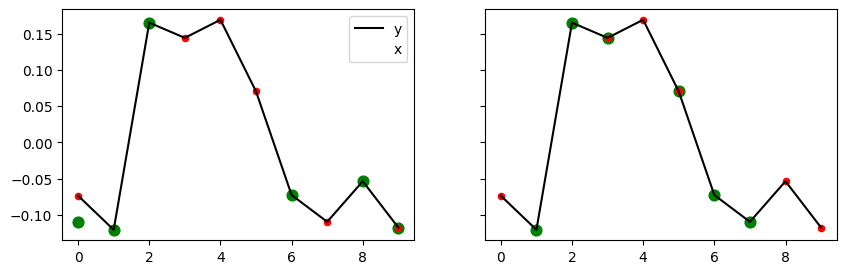

In [202]:
N = np.random.randint(0, 16)
fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
for (x0, y0), (x1, y1) in zip(old_batches, new_batches):
    
    x0_magn = x0['input'][N]
    x1_magn = x1['magnitudes'][N]
    
    x0_att_mask = x0['mask_in'][N]
    x1_att_mask = x1['att_mask'][N]   
    
    y0_magn = y0['target'][N]
    y1_magn = y1['magnitudes'][N]
    
    y0_probed_mask = x0['mask_out'][N]
    y1_probed_mask = y1['probed_mask'][N]   
    
    
    x0_time = np.arange(0, len(y1_magn))[:, None]#x0['times'][N]
    x1_time = np.arange(0, len(y1_magn))[:, None]#x1['times'][N]    
    
    x0_visible = tf.boolean_mask(x0_magn, 1-x0_att_mask)
    t0_visible = tf.boolean_mask(x0_time, 1-x0_att_mask)
    x1_visible = tf.boolean_mask(x1_magn, 1-x1_att_mask)
    t1_visible = tf.boolean_mask(x1_time, 1-x1_att_mask)
    
    x0_target = tf.boolean_mask(y0_magn, y0_probed_mask)
    t0_target = tf.boolean_mask(x0_time, y0_probed_mask)
    x1_target = tf.boolean_mask(y1_magn, y1_probed_mask)
    t1_target = tf.boolean_mask(x1_time, y1_probed_mask)
    
    
    axes[0].plot(x0_time, y0_magn, label='y', linestyle='-', color='k')
    axes[0].plot(x0_time, x0_magn, label='x', marker='', linestyle='', color='r')
    axes[0].scatter(t0_visible, x0_visible, color='g', s=60)
    axes[0].scatter(t0_target, x0_target, color='r', s=20)
    axes[0].legend()
    
    axes[1].plot(x1_time, y1_magn, label='y', linestyle='-', color='k')
    axes[1].plot(x1_time, x1_magn, label='x', marker='', linestyle='', color='r')
    
    axes[1].scatter(t1_visible, x1_visible, color='g', s=60)
    
    axes[1].scatter(t1_target, x1_target, color='r', s=20)
    
    break

## testing

In [ ]:
num_cls = pd.read_csv(os.path.join(path, 'objects.csv')).shape[0]

old_batches = pretraining_pipeline(os.path.join(path, 'train'),
                                     batch_size,
                                     window_size,
                                     msk_frac=probed,
                                     rnd_frac=random_same,
                                     same_frac=random_same,
                                     sampling=sampling, # sampling
                                     shuffle=False, #shuffle
                                     repeat=1,
                                     num_cls=None,
                                     normalize='zero-mean',
                                     cache=True)

new_batches = load_data(dataset=os.path.join(path, 'train'), 
                          batch_size=batch_size, 
                          probed=probed,  
                          random_same=random_same,
                          window_size=window_size, 
                          nsp_prob=0., 
                          repeat=1, 
                          sampling=sampling,
                          off_nsp=True,
                          shuffle=False,
                          num_cls=None)